In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv('/kaggle/input/experimental/experimental_data.csv')

In [3]:
data.head()

,Hydrogen Concentration (ppm),Sensor Measurement (ohms),Humidity (ppmv),Temperature (celsius),Pressure (mbar),Operator Name,Collection Time (seconds)
0,0.08,4.93,32497,15.04,999.98,B,1.0
1,0.17,4.51,37503,34.98,1000.00,A,2.0
2,0.00,4.52,37492,34.95,1000.02,A,3.0
3,0.04,4.85,37504,14.86,1000.00,A,4.0
4,0.00,5.06,27504,19.96,1000.01,A,5.0


### *Relationship between the Sensor Measurement and other features in the data*
* This are the scatter plots of the Sensor Measurement against each of the other features

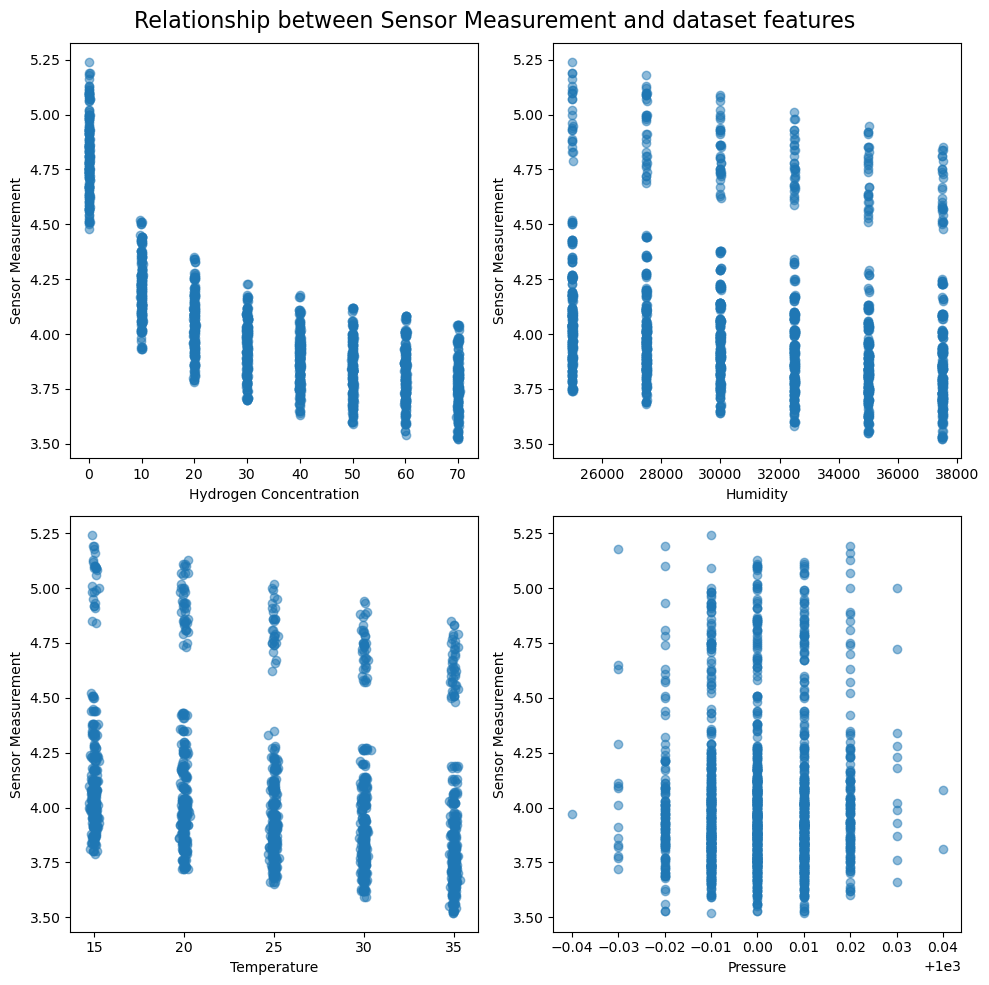

In [4]:
# Let's set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Scatter plots of the Sensor Measurement column against each other feature column
axes[0, 0].scatter(data['Hydrogen Concentration (ppm)'], data['Sensor Measurement (ohms)'], alpha=0.5)
axes[0, 0].set_xlabel('Hydrogen Concentration')
axes[0, 0].set_ylabel('Sensor Measurement')

axes[0, 1].scatter(data['Humidity (ppmv)'], data['Sensor Measurement (ohms)'], alpha=0.5)
axes[0, 1].set_xlabel('Humidity')
axes[0, 1].set_ylabel('Sensor Measurement')

axes[1, 0].scatter(data['Temperature (celsius)'], data['Sensor Measurement (ohms)'], alpha=0.5)
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Sensor Measurement')

axes[1, 1].scatter(data['Pressure (mbar)'], data['Sensor Measurement (ohms)'], alpha=0.5)
axes[1, 1].set_xlabel('Pressure')
axes[1, 1].set_ylabel('Sensor Measurement')

# Adjusting the layout and adding a title
fig.suptitle('Relationship between Sensor Measurement and dataset features', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

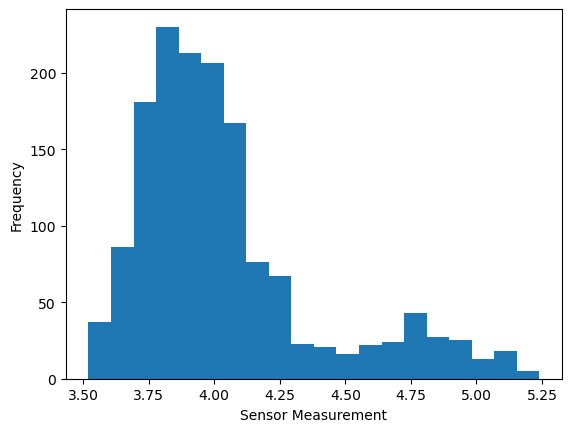

In [5]:
# Let's create histogram of the Sensor Measurement
plt.hist(data['Sensor Measurement (ohms)'], bins=20)
plt.xlabel('Sensor Measurement')
plt.ylabel('Frequency')
plt.show()


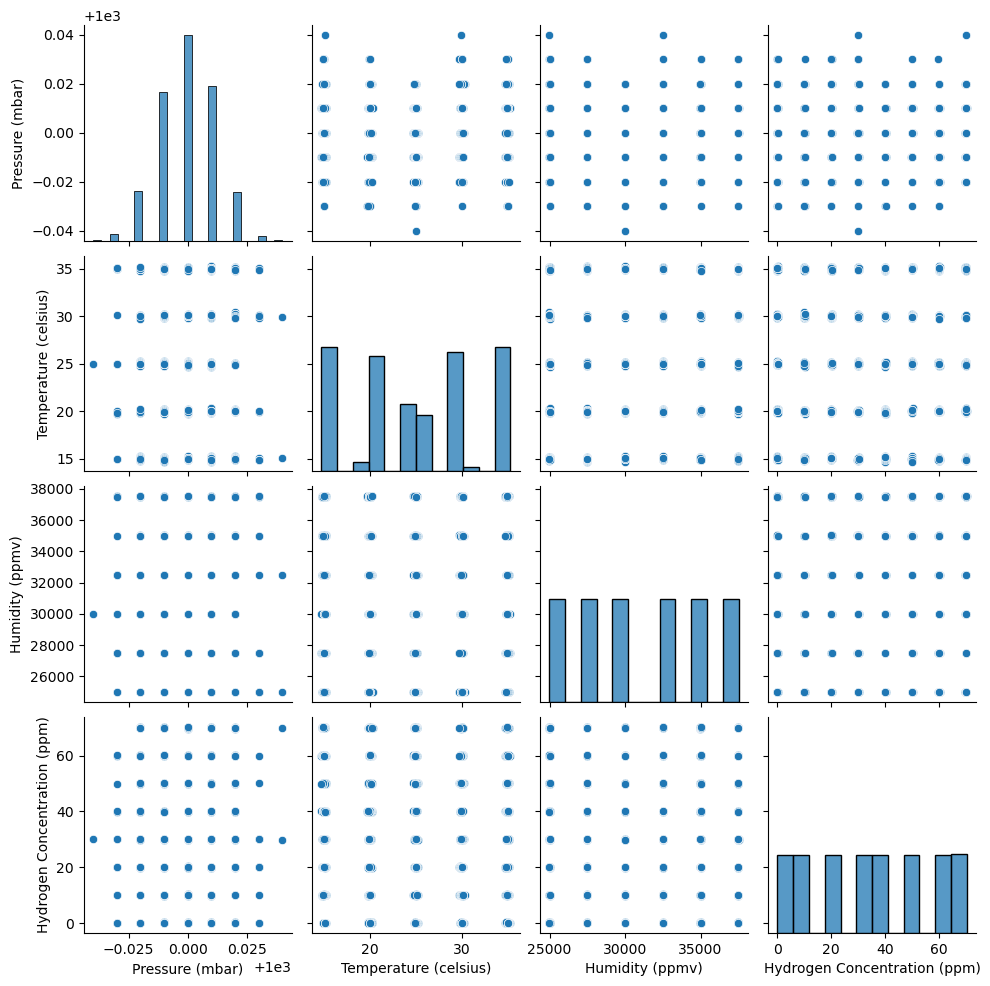

In [6]:
# Plotting a pairplot to visualize the relationships between the variables
sns.pairplot(data=data, vars=['Pressure (mbar)', 'Temperature (celsius)', 'Humidity (ppmv)', 'Hydrogen Concentration (ppm)'])

# Show the plots
plt.show()

### *Data Correlation*

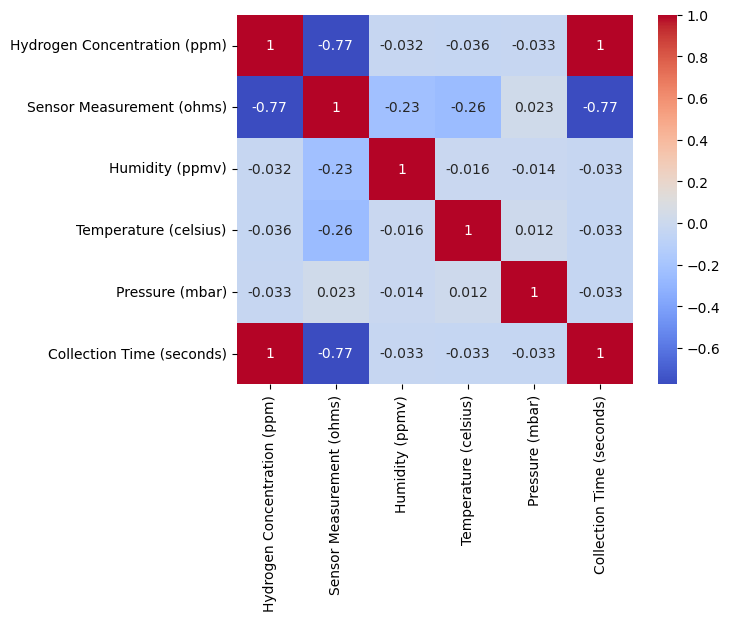

In [7]:
# Plotting a heatmap to visualize the correlation between the variables
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Show the plots
plt.show()

### *Data Statistical summary*

In [8]:
data.describe().transpose()[['mean', 'std']]

,mean,std
Hydrogen Concentration (ppm),35.095567,22.951406
Sensor Measurement (ohms),4.040080,0.349281
Humidity (ppmv),31249.499333,4270.852255
Temperature (celsius),24.998073,7.074606
Pressure (mbar),1000.000040,0.011487
Collection Time (seconds),1097.924000,659.300758


### *Comparison of Sensor Measurement data for each Operator*

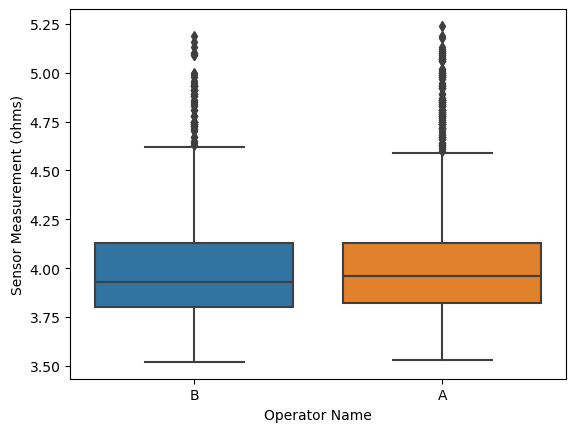

In [9]:
# Create a boxplot to visualize the sensor response for each operator
sns.boxplot(x='Operator Name', y='Sensor Measurement (ohms)', data=data)

plt.show()

In [10]:
# Perform a one-way ANOVA to test for differences in sensor response between operators
grouped_data = [
    data[data['Operator Name']=='A']['Sensor Measurement (ohms)'],
    data[data['Operator Name']=='B']['Sensor Measurement (ohms)'],
]
f_stat, p_value = f_oneway(*grouped_data)

# Print the results of the statistical test
print("F-statistic: {:.2f}".format(f_stat))
print("p-value: {:.4f}".format(p_value))

F-statistic: 0.49
p-value: 0.4825


In [11]:
data.columns

Index(['Hydrogen Concentration (ppm)', 'Sensor Measurement (ohms)',
       'Humidity (ppmv)', 'Temperature (celsius)', 'Pressure (mbar)',
       'Operator Name', 'Collection Time (seconds)'],
      dtype='object')

# Prediction Models
* We will consider it as a Linear Regression based on the data and the target to predict.

In [12]:
# Import Ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [13]:
# Seperate dataset into training features and target
X = data[['Sensor Measurement (ohms)', 'Humidity (ppmv)', 'Temperature (celsius)', 'Pressure (mbar)']]
y = data['Hydrogen Concentration (ppm)']

In [14]:
# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


#### *Split the dataset into training & testing set*

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### *Linear Regression Model*

In [16]:
# Create a linear regression model
model = LinearRegression()

In [17]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [19]:
# Let's calculate the R-squared score, which measures the goodness of fit of the model
r2 = r2_score(y_test, y_pred)
print("R-squared score: ", r2)

R-squared score:  0.7175400844906725


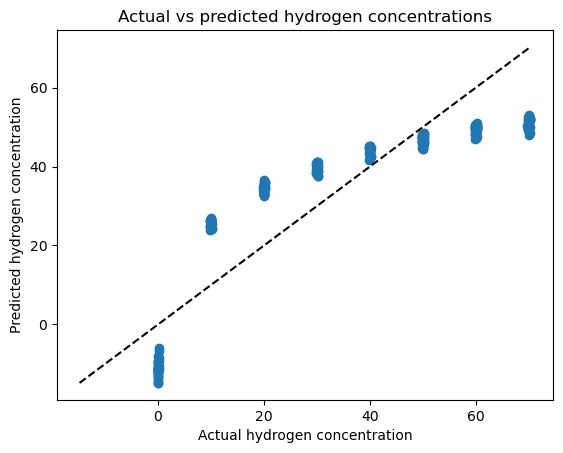

In [20]:
# plot of the actual vs predicted values for the test data
plt.scatter(y_test, y_pred)
plt.xlabel('Actual hydrogen concentration')
plt.ylabel('Predicted hydrogen concentration')
plt.title('Actual vs predicted hydrogen concentrations')

# Add a diagonal line for reference
min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], 'k--')

plt.show()

### *RandomForest Regressor model*

In [21]:
# Let's create a random forest regression model with 100 trees
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [22]:
# Fit the model to the training data
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Let's make predictions on the test data
y_forest_pred = forest_model.predict(X_test)

In [24]:
# Let's calculate the R-squared score, which measures the goodness of fit of the model
forest_r2 = r2_score(y_test, y_forest_pred)

print('R-squared score:', forest_r2)

R-squared score: 0.9768619780020928


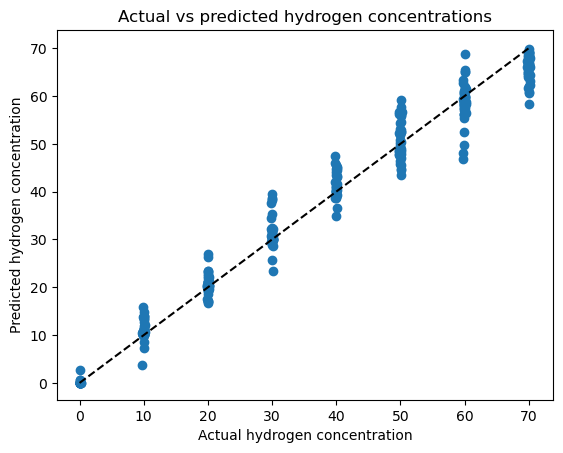

In [25]:
# plot of the actual vs predicted values for the test data
plt.scatter(y_test, y_forest_pred)
plt.xlabel('Actual hydrogen concentration')
plt.ylabel('Predicted hydrogen concentration')
plt.title('Actual vs predicted hydrogen concentrations')

# Add a diagonal line for reference
min_value = min(min(y_test), min(y_forest_pred))
max_value = max(max(y_test), max(y_forest_pred))
plt.plot([min_value, max_value], [min_value, max_value], 'k--')

plt.show()

### *Support Vector Regression model*

In [26]:
# Let's create a support vector regression model
vector_model = SVR(kernel='rbf')

In [27]:
# Fit the model to the training data
vector_model.fit(X_train, y_train)


SVR()

In [28]:
# Let's Make predictions on the test data
y_vector_pred = vector_model.predict(X_test)

In [29]:
# Let's calculate the R-squared score
vector_r2 = r2_score(y_test, y_vector_pred)

print('R-squared score:', vector_r2)

R-squared score: 0.8371717785572343


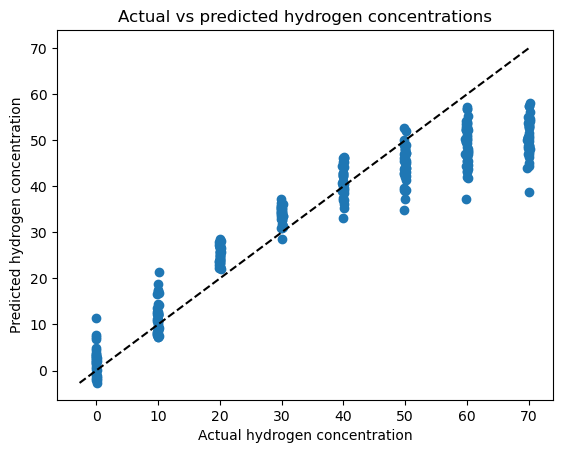

In [30]:
# plot of the actual vs predicted values for the test data
plt.scatter(y_test, y_vector_pred)
plt.xlabel('Actual hydrogen concentration')
plt.ylabel('Predicted hydrogen concentration')
plt.title('Actual vs predicted hydrogen concentrations')

# Add a diagonal line for reference
min_value = min(min(y_test), min(y_vector_pred))
max_value = max(max(y_test), max(y_vector_pred))
plt.plot([min_value, max_value], [min_value, max_value], 'k--')

plt.show()

Random Forest Regression performed better in this prediction.
This works best because, a prediction is made using a variety of decision trees using the ensemble learning technique. The individual decision trees in the random forest are each trained on various subsets of the data, and the combined prediction comes from each tree's predictions.

**R-squared score of this is 97.7%**